Pandas Library <br>
Pandas is powerful, flexible and easy to use open source data analysis and manipulation Python library. <br>

DataFrame
A dataframe is a a data structure that organizes data into a 2-dimensional table of rows and columns, much like an Excel table.
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html <br>
https://datatofish.com/export-pandas-dataframe-json/ <br><br><br>


What can we do with Pandas Dataframes?
- Data cleansing
- Merges and joins
- Data visualization
- Statistical analysis
- Data inspection
- Loading and saving data
- And a lot more



In [2]:
import pandas as pd

In [3]:
countries_list = [{"country_name": "Romania", "continent": "Europe"}, {"country_name": "USA", "continent": "North America"},  {"country_name": "Thailand", "continent": "Asia"}, {"country_name": None, "continent": None}]

In [4]:
# create df from a dummy list
df_from_list = pd.DataFrame(countries_list)
df_from_list

,country_name,continent
0,Romania,Europe
1,USA,North America
2,Thailand,Asia
3,None,None


In [5]:
# save df into a json file keeping the index
df_from_list.to_json("countries.json")  

# save df into a json file without index, i.e. a list of dictionaries as per above declaration of countries_list variable
df_from_list.to_json("countries.json", orient="records")

# there are other ways to save a df to a json file

In [6]:
# load a json file into a df
df_from_json_file = pd.read_json("countries.json")
df_from_json_file

,country_name,continent
0,Romania,Europe
1,USA,North America
2,Thailand,Asia
3,None,None


In [7]:
# save df to a csv file without index
df_from_list.to_csv("countries.csv", index=False)

# load a csv file into a df
df_from_csv_file = pd.read_csv("countries.csv")
df_from_csv_file

,country_name,continent
0,Romania,Europe
1,USA,North America
2,Thailand,Asia
3,NaN,NaN


Columns

In [8]:
df_from_list.columns

Index(['country_name', 'continent'], dtype='object')

Index

In [9]:
df_from_list.index

RangeIndex(start=0, stop=4, step=1)

Inspect the data

In [10]:
df_from_list.shape

(4, 2)

Columns data types

In [11]:
df_from_list.dtypes

country_name    object
continent       object
dtype: object

Get first n rows

In [12]:
df_from_list.head(1)

,country_name,continent
0,Romania,Europe


Get last n rows

In [13]:
df_from_list.tail(1)

,country_name,continent
3,None,None


Information on the Dataframe

In [14]:
df_from_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_name  3 non-null      object
 1   continent     3 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


Get values from certain column(s)

In [15]:
df_from_list["country_name"]

0     Romania
1         USA
2    Thailand
3        None
Name: country_name, dtype: object

Get certain rows. In the example below, rows with index 1 and 2

In [16]:
df_from_list[1:3]

,country_name,continent
1,USA,North America
2,Thailand,Asia


Filter data

In [17]:
df_from_list[df_from_list["country_name"]=="Romania"]

,country_name,continent
0,Romania,Europe


Add new column

In [23]:
# df = df_from_list.assign(capital=None)
df = df_from_list.assign(capital=["Bucharest", "Washington, D.C.", "Bangkok", None])
df


,country_name,continent,capital
0,Romania,Europe,Bucharest
1,USA,North America,"Washington, D.C."
2,Thailand,Asia,Bangkok
3,None,None,None


Drop a column

In [26]:
df = df.assign(dummy=None)
print(df)
print()

df.drop('dummy', axis=1, inplace=True)
df

  country_name      continent           capital dummy
0      Romania         Europe         Bucharest  None
1          USA  North America  Washington, D.C.  None
2     Thailand           Asia           Bangkok  None
3         None           None              None  None



,country_name,continent,capital
0,Romania,Europe,Bucharest
1,USA,North America,"Washington, D.C."
2,Thailand,Asia,Bangkok
3,None,None,None


Rename a column

In [31]:
df.rename(columns={'country_name': 'name'}, inplace=True)
df.columns

Index(['name', 'continent', 'capital'], dtype='object')

Add new row

In [32]:
df.loc[len(df.index)] = ['Spain', "Europe", "Madrid"] 
df

# Note that you can also concat 2 dataframes

,name,continent,capital
0,Romania,Europe,Bucharest
1,USA,North America,"Washington, D.C."
2,Thailand,Asia,Bangkok
3,None,None,None
4,Spain,Europe,Madrid


Counts of unique rows 

In [33]:
print(df.value_counts(sort=True, ascending=False))
print()
print(df.value_counts(dropna=False))

name      continent      capital         
Romania   Europe         Bucharest           1
Spain     Europe         Madrid              1
Thailand  Asia           Bangkok             1
USA       North America  Washington, D.C.    1
dtype: int64

name      continent      capital         
Romania   Europe         Bucharest           1
Spain     Europe         Madrid              1
Thailand  Asia           Bangkok             1
USA       North America  Washington, D.C.    1
NaN       NaN            NaN                 1
dtype: int64


Group by

In [43]:
gb = df.groupby("continent")
gb.get_group('Europe')

,name,continent,capital
0,Romania,Europe,Bucharest
4,Spain,Europe,Madrid


In [45]:
gb = df.groupby("continent").count()
gb

,name,capital
continent,,
Asia,1,1
Europe,2,2
North America,1,1


In [ ]:
%pip install matplotlib
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='continent', ylabel='name'>

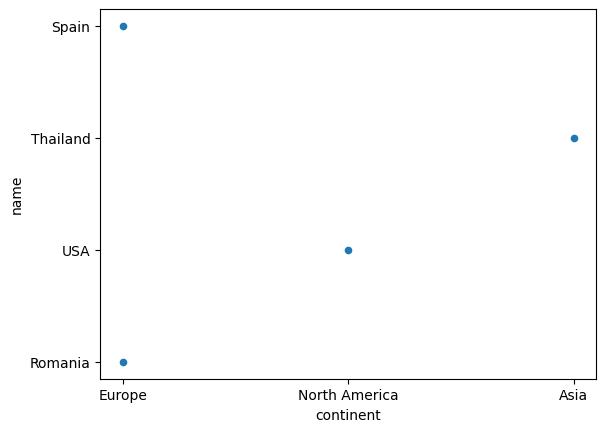

In [59]:
df.dropna(inplace=True)
df
df.plot(x='continent', y='name', kind='scatter')	

Plot a group by object

<AxesSubplot: xlabel='continent'>

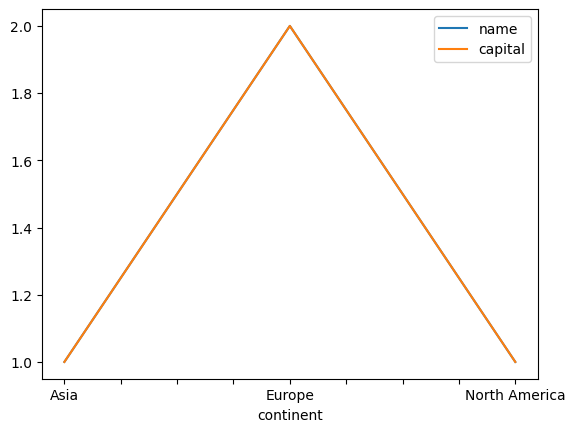

In [60]:
gb.plot()